<a href="https://colab.research.google.com/github/yashrohilla25/Toposis/blob/main/toposis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Performance Metrics for Models:
        Model  Accuracy  BLEU_Score  Inference_Time  Model_Size
0        BART      0.87        0.45             1.2         120
1          T5      0.85        0.44             1.5         220
2     Pegasus      0.88        0.48             1.1         180
3     GPT-3.5      0.91        0.52             2.3         355
4  Longformer      0.84        0.43             1.8         270

TOPSIS Results:
        Model  Accuracy  BLEU_Score  Inference_Time  Model_Size  Closeness  \
2     Pegasus      0.88        0.48             1.1         180   0.813783   
0        BART      0.87        0.45             1.2         120   0.768297   
1          T5      0.85        0.44             1.5         220   0.565293   
4  Longformer      0.84        0.43             1.8         270   0.360902   
3     GPT-3.5      0.91        0.52             2.3         355   0.274286   

   Rank  
2     1  
0     2  
1     3  
4     4  
3     5  


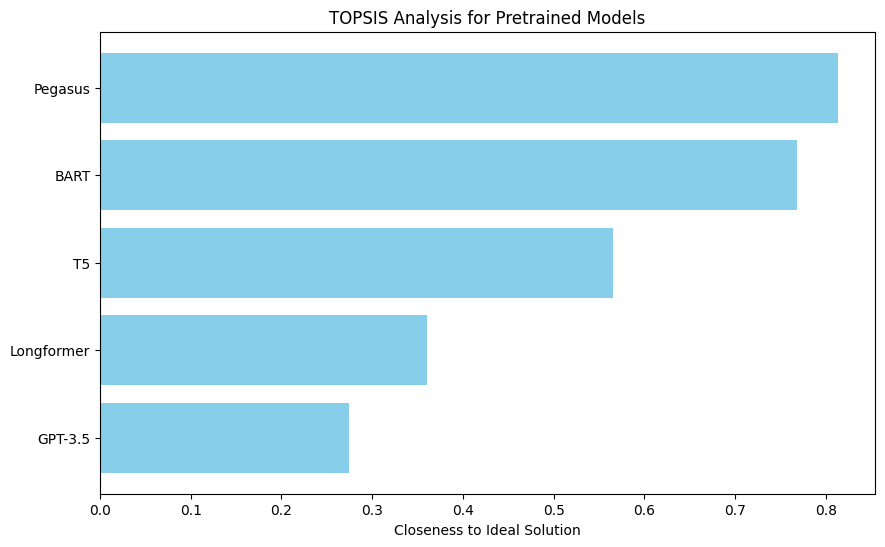

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample performance metrics for pretrained models
data = {
    "Model": ["BART", "T5", "Pegasus", "GPT-3.5", "Longformer"],
    "Accuracy": [0.87, 0.85, 0.88, 0.91, 0.84],
    "BLEU_Score": [0.45, 0.44, 0.48, 0.52, 0.43],
    "Inference_Time": [1.2, 1.5, 1.1, 2.3, 1.8],  # Lower is better
    "Model_Size": [120, 220, 180, 355, 270],  # Lower is better
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the initial dataset
print("Performance Metrics for Models:")
print(df)

# Step 1: Normalize the decision matrix
def normalize(matrix):
    return matrix / np.sqrt((matrix**2).sum(axis=0))

# Step 2: Calculate the weighted normalized decision matrix
def weighted_normalized_matrix(matrix, weights):
    return matrix * weights

# Step 3: Find the ideal and negative-ideal solutions
def calculate_ideal_solutions(weighted_matrix, is_beneficial):
    ideal_solution = np.max(weighted_matrix, axis=0) * is_beneficial + np.min(weighted_matrix, axis=0) * ~is_beneficial
    negative_ideal_solution = np.min(weighted_matrix, axis=0) * is_beneficial + np.max(weighted_matrix, axis=0) * ~is_beneficial
    return ideal_solution, negative_ideal_solution

# Step 4: Calculate the distances to ideal and negative-ideal solutions
def calculate_distances(weighted_matrix, ideal_solution, negative_ideal_solution):
    distance_to_ideal = np.sqrt(((weighted_matrix - ideal_solution) ** 2).sum(axis=1))
    distance_to_negative_ideal = np.sqrt(((weighted_matrix - negative_ideal_solution) ** 2).sum(axis=1))
    return distance_to_ideal, distance_to_negative_ideal

# Step 5: Calculate the relative closeness to the ideal solution
def calculate_closeness(distance_to_ideal, distance_to_negative_ideal):
    return distance_to_negative_ideal / (distance_to_ideal + distance_to_negative_ideal)

# Prepare decision matrix
criteria = df.drop("Model", axis=1)
decision_matrix = criteria.values

# Define weights for the criteria (importance of each criterion)
weights = np.array([0.4, 0.3, 0.2, 0.1])  # Adjust these weights based on priority

# Define whether the criterion is beneficial (True) or non-beneficial (False)
is_beneficial = np.array([True, True, False, False])

# Normalize the matrix
normalized_matrix = normalize(decision_matrix)

# Calculate the weighted normalized matrix
weighted_matrix = weighted_normalized_matrix(normalized_matrix, weights)

# Find the ideal and negative-ideal solutions
ideal_solution, negative_ideal_solution = calculate_ideal_solutions(weighted_matrix, is_beneficial)

# Calculate distances
distance_to_ideal, distance_to_negative_ideal = calculate_distances(weighted_matrix, ideal_solution, negative_ideal_solution)

# Calculate relative closeness
closeness = calculate_closeness(distance_to_ideal, distance_to_negative_ideal)

# Add results to the DataFrame
df["Closeness"] = closeness
df["Rank"] = df["Closeness"].rank(ascending=False).astype(int)

# Sort by rank
df_sorted = df.sort_values("Rank")

print("\nTOPSIS Results:")
print(df_sorted)

# Visualization: Closeness scores
plt.figure(figsize=(10, 6))
plt.barh(df_sorted["Model"], df_sorted["Closeness"], color='skyblue')
plt.xlabel("Closeness to Ideal Solution")
plt.title("TOPSIS Analysis for Pretrained Models")
plt.gca().invert_yaxis()
plt.show()


In [2]:
df_sorted.to_csv("topsis_results.csv", index=False)
from google.colab import files
files.download("topsis_results.csv")




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>